<a href="https://colab.research.google.com/github/Iryna-Lytvynchuk/Data_Science/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, kernel_regularizer = regularizers.l2(0.001), activation='relu'),
    keras.layers.Dense(128, kernel_regularizer = regularizers.l2(0.001), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=128)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3500 - accuracy: 0.8980 - val_loss: 0.3916 - val_accuracy: 0.8822
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3440 - accuracy: 0.8981 - val_loss: 0.3897 - val_accuracy: 0.8867
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3409 - accuracy: 0.8990 - val_loss: 0.3835 - val_accuracy: 0.8835
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3417 - accuracy: 0.8984 - val_loss: 0.3875 - val_accuracy: 0.8827
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3432 - accuracy: 0.8987 - val_loss: 0.3816 - val_accuracy: 0.8839
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3406 - accuracy: 0.8993 - val_loss: 0.3906 - val_accuracy: 0.8823
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3371 - accuracy: 0.8996 - val_loss: 0.3877 - val_accuracy: 0.8815
Epoch 

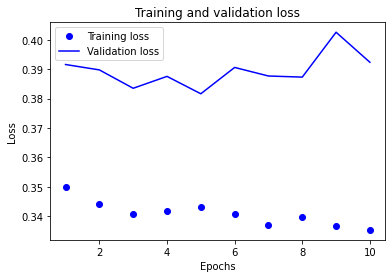

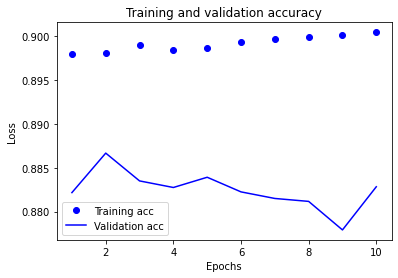

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.4192 - accuracy: 0.8723
[0.4191812574863434, 0.8723000288009644]
